# Bootstrapping

- Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly sampling with replacement.
- It’s useful when:
    - The sample size is small.
    - The underlying distribution is unknown.
    - We want to calculate confidence intervals without relying on parametric assumptions.
- Traditional methods assume normality, but real-world data is often skewed.
- Bootstrapping allows us to:
    - Estimate confidence intervals for any metric.
    - Compare treatment & control groups without strict assumptions.
    - Assess statistical significance without needing large sample sizes. 

### Basic Bootstrapping (Mean & Confidence Intervals)

95% Confidence Interval for Mean: (45.91, 50.94)


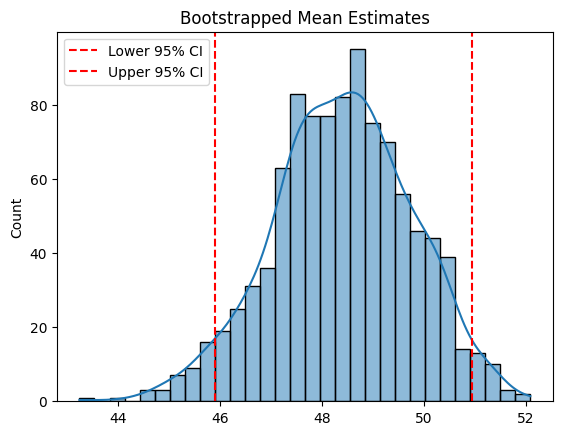

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated experiment data (e.g., user spending)
np.random.seed(42)
data = pd.DataFrame({'spending': np.random.normal(50, 15, 100)})

# Bootstrap function
def bootstrap_mean(data, num_samples=1000):
    boot_means = [data.sample(frac=1, replace=True)['spending'].mean() for i in range(num_samples)]
    return np.percentile(boot_means, [2.5, 97.5])  # 95% confidence interval

# Compute bootstrap confidence interval
ci_low, ci_high = bootstrap_mean(data)

print(f"95% Confidence Interval for Mean: ({ci_low:.2f}, {ci_high:.2f})")

# Plot bootstrap distribution
boot_means = [data.sample(frac=1, replace=True)['spending'].mean() for i in range(1000)]
sns.histplot(boot_means, kde=True, bins=30)
plt.axvline(ci_low, color='red', linestyle='dashed', label="Lower 95% CI")
plt.axvline(ci_high, color='red', linestyle='dashed', label="Upper 95% CI")
plt.legend()
plt.title("Bootstrapped Mean Estimates")
plt.show()

### Bias-Corrected & Accelerated (BCa) Bootstrapping
- <b>Use case</b>: When the distribution is skewed, BCa adjusts for bias.
- <b>How it works</b>: It adjusts the confidence interval by correcting for bias and skewness.

In [3]:
from scipy.stats import bootstrap

# Compute BCa bootstrap confidence interval
bca_ci = bootstrap((data['spending'],), np.mean, confidence_level=0.95, method="BCa")

print(f"BCa 95% CI: ({bca_ci.confidence_interval.low:.2f}, {bca_ci.confidence_interval.high:.2f})")


BCa 95% CI: (45.84, 51.12)


### Bootstrapping for A/B Testing
- <b>Use case</b>: Compare two experimental groups without assuming normality.
- <b>How it works</b>:
    - Bootstrap the difference in means between treatment & control.
    - Compute a p-value to check significance.

In [8]:
# Simulated A/B experiment data
np.random.seed(42)
control = np.random.normal(50, 15, 100)
treatment = np.random.normal(55, 15, 100)

# Bootstrap function for difference in means
def bootstrap_diff(control, treatment, num_samples=1000):
    boot_diffs = []
    for i in range(num_samples):
        boot_control = np.random.choice(control, size=len(control), replace=True)
        boot_treatment = np.random.choice(treatment, size=len(treatment), replace=True)
        boot_diffs.append(np.mean(boot_treatment) - np.mean(boot_control))
    return boot_diffs

# Compute bootstrap distribution
boot_diffs = bootstrap_diff(control, treatment)

# Compute p-value (two-tailed test)
p_value = np.mean(np.abs(boot_diffs) >= np.abs(np.mean(treatment) - np.mean(control)))
print(f"P-value: {p_value:.3f}")



P-value: 0.497


### Best Practices & Validations

- Use bootstrapping when sample size is small.
- Run at least 1,000 resamples for stable estimates.
- Compare results with parametric methods to check consistency.
- Use BCa bootstrapping for skewed data.